# **[Chapter 03] TabNet 활용 회귀**  
**┗ 부동산 가격 예측**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「Data 전처리 및 EDA」
* 🥈Session 2 - 「Feature Selection」
* 🥇Session 3 - 「TabNet 활용 소득 예측」

In [ ]:
# ▶ TabNnet 설치 후 런타임 > 재시작 필요 (메뉴 - 런타임 - 런타임 다시 시작)
# ▶ doc : https://dreamquark-ai.github.io/tabnet/
# ▶ example >: https://github.com/dreamquark-ai/tabnet/blob/develop/regression_example.ipynb
!pip install pytorch-tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
# import os
# os.chdir("/content/drive/MyDrive/Colab Notebooks/00.Fast_campus/03.Deep_learning_tabular/Chapter03_TabNet_Reg")
# os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Colab Notebooks/00.Fast_campus/03.Deep_learning_tabular/Chapter03_TabNet_Reg'

## **문제상황 및 데이터 살펴보기**
---
> **시나리오** 🏡

```
A사는 해외 주택을 구매하여 임대 사업을 진행하고 있는 스타트업이다. 해외 주택을 구매할 때 매 번 가격이 상이하여 표준화된  
가격 범위를 구축하려고 한다. 다양한 주택에 관련된 데이터를 통해 주택 가격을 예측하는 모델을 만들고 이를 활용하여 매입 시  
base-line으로 사용하려고 한다.

```  

> **데이터 살펴보기**

* 주택 관련 데이터
* 데이터 명세 ⬇
* https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

|Column|Description|
|:---|:---|
|SalePrice|부동산 판매가격|
|MSSubClass|빌딩 클래스|
|MSZoning|일반 구역 분류|
|LotFrontage|부동산에 연결된 거리의 선형 피트|
|LotArea|로트 크기(제곱 피트)|
|Street|도로 접근 유형|
|Alley|골목길 접근 유형|
|LotShape|속성의 일반 형태|
|LandContour|부동산의 평탄성|
|Utilities|사용 가능한 유틸리티 유형|
|LotConfig|Lot 구성|
|LandSlope|토지 경사|
|Neighborhood|이웃의 물리적 위치|
|Condition1|간선 도로 또는 철도에 대한 근접성|
|Condition2|간선 도로 또는 철도에 대한 근접성(두 번째가 있는 경우)|
|BldgType|주거 유형|
|HouseStyle|주거 스타일|
|OverallQual|전체 재료 및 마감 품질|
|OverallCond|종합조건등급|
|YearBuilt|시공연도|
|YearRemodAdd|리모델링 날짜|
|RoofStyle|지붕 스타일|
|RoofMatl|지붕 재료|
|Exterior1st|주택외부재질|
|Exterior2nd|주택외부재질(재질이 여러개인 경우)|
|MasVnrType|석조베니어 타입|
|MasVnrArea|석조베니어 영역|
|ExterQual|외장재 품질|
|ExterCond|외부재료 상태|
|Foundation|기초의 종류|
|BsmtQual|지하실 높이|
|BsmtCond|지하실 상태|
|BsmtExposure|워크아웃 또는 정원수준의 지하 벽|
|BsmtFinType1|지하 마감구역 품질|
|BsmtFinSF1|타입1 마감 평방 피트|
|BsmtFinType2|두 번째 마감구역 품질(있는 경우)|
|BsmtFinSF2|타입2 마감 평방 피트|
|BsmtUnfSF|미완성 지하 면적 평방 피트|
|TotalBsmtSF|청 지하 면적 평방 피트|
|Heating|난방 종류|
|HeatingQC|난방 품질 및 상태|
|CentralAir|중앙 에어컨|
|Electrical|전기 시스템|
|1stFlrSF|1층 평방 피트|
|2ndFlrSF|2층 평방 피트|
|LowQualFinSF|저품질 마감 평방 피트(전체 층)|
|GrLivArea|지상 거주면적 평방 피트|
|BsmtFullBath|지하실 전체 욕실|
|BsmtHalfBath|지하실 하프 욕실|
|FullBath|전체 욕실|
|HalfBath|하프 욕실|
|Bedroom|침실|
|Kitchen|주방|
|KitchenQual|주방품질|
|TotRmsAbvGrd|총 객실|
|Functional|홈 기능 등급|
|Fireplaces|벽난로|
|FireplaceQu|벽난로 품질|
|GarageType|차고 유형|
|GarageYrBlt|차고 준공년도|
|GarageFinish|차고 내부마감|
|GarageCars|자동차 차고 크기|
|GarageArea|차고 면적(평방 피트)|
|GarageQual|차고 품질|
|GarageCond|차고 상태|
|PavedDrive|포장 진입로|
|WoodDeckSF|목재 데크 면적|
|OpenPorchSF|현관 영역|
|EnclosedPorch|밀폐형 현관 면적|
|3SsnPorch|3계절 현관 면적|
|ScreenPorch|스크린 포트|
|PoolArea|풀 면적|
|PoolQC|풀 품질|
|Fence|울타리 품질|
|MiscFeature|기타기능|
|MiscVal|기타기능의 가치|
|MoSold|월 별 판매|
|YrSold|판매연도|
|SaleType|판매종류|
|SaleCondition|판매조건|

In [ ]:
# ▶ pd.set option
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

# ▶ Data read
train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')
solution_df = pd.read_csv('solution.csv')

In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# ▶ test_df left Join solution_df
test_df = pd.merge(test_df, solution_df, how='left', on='Id')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000.0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000.0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900.0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500.0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500.0


In [ ]:
# ▶ Data Concat
df = pd.concat([train_df, test_df],axis=0)
df.shape

(2919, 81)


## **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 주택 매입 시 적정 금액 산정 어려움
```  

> **기대효과**

```
▶ 주태 매입 시 표준금액(base-line) 활용 및 적정 금액으로 매수
```

> **해결방안**

```
▶ 주택 가격 예측 모델링을 통한 적정 주택 가격 산정
▶ Session 1 🥉
 - Data 전처리 및 EDA
▶ Session 2 🥈
 - 유의미한 변수를 찾는 Feature Selection
▶ Session 3 🥇
 - TabNet 알고리즘 사용 부동산 가격 예측 모델링 수행
```

> **성과측정**  

```
▶ 모델 운용 전/후 평균 부동산(동일 범주의 건물) 매입 가격 비교
```

> **현업적용**  

```
▶ 부동산 매입 시 매입 가격 선정 시 활용
```

> **주요 코드 미리 살펴보기**  

```
▶ Session 1 → .apply(lambda x: x.fillna(x.mean()),axis=0), sns.distplot(df['SalePrice'])
▶ Session 2 → .corr(), .sort_values(ascending=False)), mask=np.triu(df_num.corr())
▶ Session 3 → reg = TabNetRegressor(), np.arange(len(val_rmse)), mean_squared_error(y_test, preds)**0.5, reg.explain(X_test)
```

## **🥉Session 1**  
**┗ Data 전처리 및 EDA**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  

In [ ]:
# ▶ Data 형태 확인
# ▶ 2,919 row, 81 col로 구성됨
print('df', df.shape)

df (2919, 81)


In [ ]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [ ]:
# ▶ Null 값 확인
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
# ▶ Null 값>0 이상인 Data 출력, 확인용
null_df = pd.DataFrame(df.isnull().sum()>0, columns=['T/F'])
null_df = null_df[null_df['T/F']==True]
df[null_df.index]

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,SBrkr,1.0,0.0,Gd,Typ,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
1,RL,80.0,NaN,AllPub,MetalSd,MetalSd,None,0.0,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,SBrkr,0.0,1.0,TA,Typ,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
2,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,SBrkr,1.0,0.0,Gd,Typ,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
3,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,None,0.0,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,SBrkr,1.0,0.0,Gd,Typ,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
4,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,SBrkr,1.0,0.0,Gd,Typ,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,NaN,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,SBrkr,0.0,0.0,TA,Typ,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,WD
1455,RM,21.0,NaN,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,SBrkr,0.0,0.0,TA,Typ,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,NaN,NaN,NaN,WD
1456,RL,160.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,SBrkr,1.0,0.0,TA,Typ,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,NaN,NaN,NaN,WD
1457,RL,62.0,NaN,AllPub,HdBoard,Wd Shng,None,0.0,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,SBrkr,0.0,1.0,TA,Typ,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,MnPrv,Shed,WD


In [ ]:
# ▶ Null 값이 전체 Data set에서 50% 이상을 차지하는 컬럼은 사전 제거
# - FireplaceQu        690
# - PoolQC           1,453
# - Fence            1,179
# - MiscFeature      1,406

df = df.drop(['FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

# ▶ 숫자형 변수에 경우 평균 값을 대체, 문자형 변수의 경우 'None'로 대체

# ▶ numeric, categorical value 나누기
numerical_list=[]
categorical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categorical_list.append(i)
  else :
    numerical_list.append(i)

print("categorical_list :", categorical_list)
print("numerical_list :", numerical_list)

# ▶ n_features 변환
df[numerical_list] = df[numerical_list].apply(lambda x: x.fillna(x.mean()),axis=0)

# ▶ c_features 변환
df[categorical_list] = df[categorical_list].apply(lambda x: x.fillna('None'),axis=0)

categorical_list : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
numerical_list : ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch

In [ ]:
# ▶ Null 값 재 확인
df.isnull().sum().sum()

0

In [ ]:
# ▶ Outlier 확인
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180707.333333
std,842.787043,42.517628,21.312345,7886.996359,1.409947,1.113131,30.291442,20.894344,178.626089,455.532750,169.176615,439.468337,440.690726,392.362079,428.701456,46.396825,506.051045,0.524556,0.245603,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,24.867762,0.761494,215.357904,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79970.412811
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,730.500000,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.500000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129325.000000
50%,1460.000000,50.000000,69.305795,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,369.000000,0.000000,467.000000,990.000000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.113406,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,805.000000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213495.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### · Target 변수 분포 확인
---
* 예측 하고자 하는 Target 변수(SalePrice) 분포 확인

In [ ]:
# ▶ 부동산 가격 기술 통계량 확인
df['SalePrice'].describe()

count      2919.000000
mean     180707.333333
std       79970.412811
min       12789.000000
25%      129325.000000
50%      160000.000000
75%      213495.000000
max      755000.000000
Name: SalePrice, dtype: float64

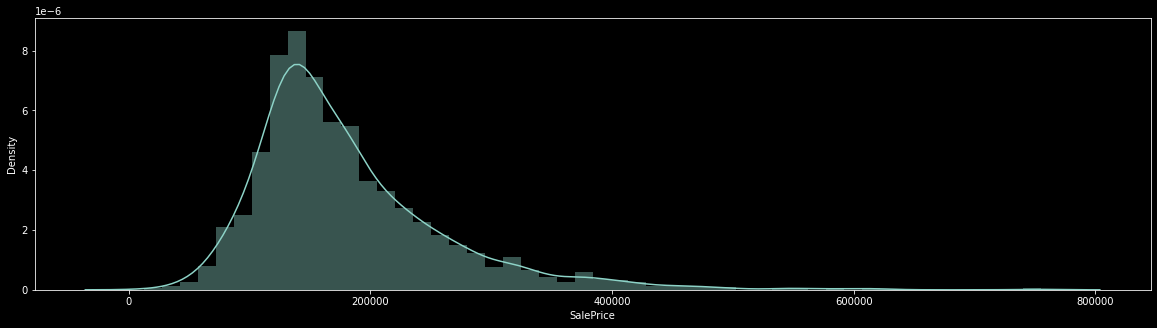

In [ ]:
# ▶ distplot을 통해 분포 직관적으로 확인
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

fig = plt.figure(figsize=(20,5));
sns.distplot(df['SalePrice']);

## **🥈Session 2**  
**┗ Feature Selection**  
---

### · 숫자형 변수와 타겟 관계 탐색
---
* corr() 활용 상관관계 분석

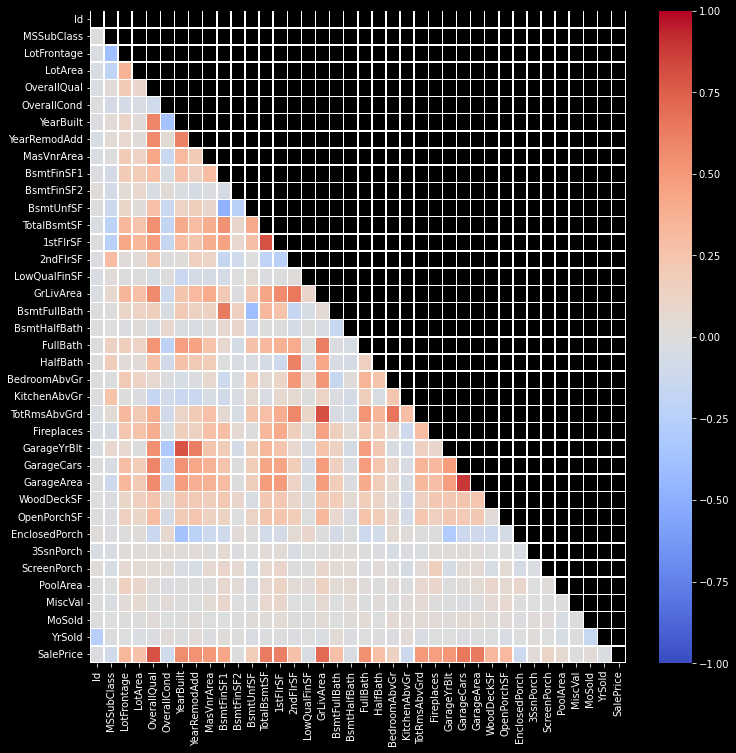

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])


# ▶ corr() 활용, numerical value 상관관계 확인
fig = plt.figure(figsize=(12,12))
df_num = df[numerical_list].corr()
sns.heatmap(df_num, vmin = -1, vmax = +1, annot = False, cmap = 'coolwarm', linewidths=.5,mask=np.triu(df_num.corr()));

In [ ]:
# ▶ 상관계수 중 target 변수인 SalePrice 열(col)만 가져오기
df_corr_y = pd.DataFrame(df_num['SalePrice'].sort_values(ascending=False))
df_corr_y

,SalePrice
SalePrice,1.000000
OverallQual,0.800888
GrLivArea,0.708096
GarageCars,0.649497
GarageArea,0.641731
TotalBsmtSF,0.633055
1stFlrSF,0.621541
YearBuilt,0.558433
FullBath,0.548138
YearRemodAdd,0.533158


In [ ]:
# ▶ 피어슨 상관계수 절대값 기준 0.4 초과 Selection
# ▶ 회귀 관련 알고리즘 활용시에는 다중공선성 제거를 위해, Feature간 상관관계 고려하여 Selection이 이루어져야 함
df_corr_y[abs(df_corr_y['SalePrice']) > 0.4].index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'FullBath', 'YearRemodAdd',
       'GarageYrBlt', 'MasVnrArea', 'TotRmsAbvGrd', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

In [ ]:
# ▶ 최종 선택 numerical feature
n_features = list(df_corr_y[abs(df_corr_y['SalePrice']) > 0.4].index)
print(n_features)

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'FullBath', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'TotRmsAbvGrd', 'Fireplaces', 'BsmtFinSF1']


In [ ]:
len(n_features)

15

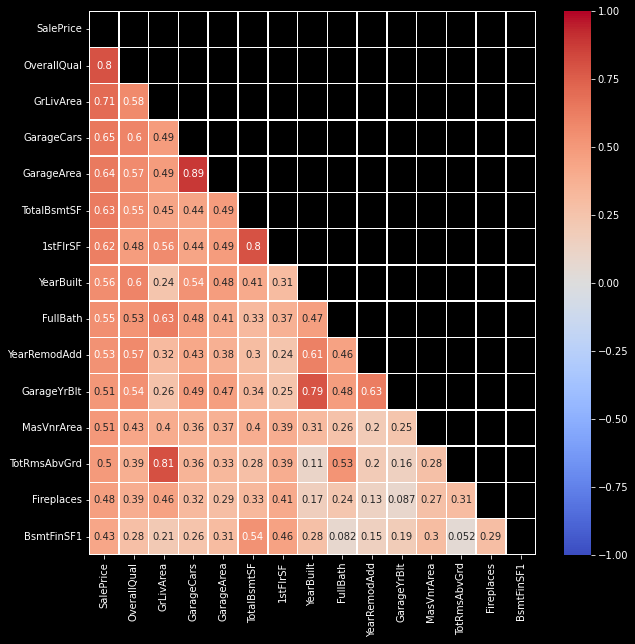

In [ ]:
# ▶ corr() 활용, numerical value 상관관계 확인
fig = plt.figure(figsize=(10,10))
df_num = df[n_features].corr()
sns.heatmap(df_num, vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', linewidths=.5, mask=np.triu(df_num.corr()));

### · 문자형 변수와 타겟 관계 탐색
---
* corr() 활용 상관관계 분석

In [ ]:
# ▶ 카테고리 데이터 리스트 확인
print(categorical_list)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [ ]:
df['SalePrice'].describe()

count      2919.000000
mean     180707.333333
std       79970.412811
min       12789.000000
25%      129325.000000
50%      160000.000000
75%      213495.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
# ▶ 카테고리 변수 Level 별 타겟 변수 평균 값 확인
for i in categorical_list :
  print(df.groupby(i)['SalePrice'].mean().sort_values(ascending=False))
  print('---------------------')

MSZoning
FV         218968.964029
RL         191275.311700
RH         136397.461538
RM         126115.226087
C (all)     79795.040000
None        63806.250000
Name: SalePrice, dtype: float64
---------------------
Street
Pave    181012.984520
Grvl    106663.333333
Name: SalePrice, dtype: float64
---------------------
Alley
None    183336.508269
Pave    176913.307692
Grvl    123556.908333
Name: SalePrice, dtype: float64
---------------------
LotShape
IR2    229588.355263
IR3    221922.812500
IR1    211002.754132
Reg    162579.107047
Name: SalePrice, dtype: float64
---------------------
LandContour
HLS    253924.525000
Low    194882.733333
Lvl    178636.350877
Bnk    144754.589744
Name: SalePrice, dtype: float64
---------------------
Utilities
AllPub    180786.893347
NoSeWa    137500.000000
None       86312.500000
Name: SalePrice, dtype: float64
---------------------
LotConfig
CulDSac    226291.119318
FR3        196635.857143
Corner     179956.937378
Inside     177283.697140
FR2        17

In [ ]:
# ▶ df로 변경
list_of_df = []

for var in categorical_list :
  temp = df.groupby(var)['SalePrice'].agg(['count', 'mean']).sort_values(by=['mean'], ascending=False)
  temp['lift'] = temp['mean'] / df['SalePrice'].mean()
  temp['ratio'] = round((temp['count'] / len(df))*100,2)
  print(temp)
  print('______________________________________________________________')

          count           mean      lift  ratio
MSZoning                                       
FV          139  218968.964029  1.211733   4.76
RL         2265  191275.311700  1.058481  77.60
RH           26  136397.461538  0.754798   0.89
RM          460  126115.226087  0.697898  15.76
C (all)      25   79795.040000  0.441571   0.86
None          4   63806.250000  0.353092   0.14
______________________________________________________________
        count           mean      lift  ratio
Street                                       
Pave     2907  181012.984520  1.001691  99.59
Grvl       12  106663.333333  0.590255   0.41
______________________________________________________________
       count           mean      lift  ratio
Alley                                       
None    2721  183336.508269  1.014549  93.22
Pave      78  176913.307692  0.979005   2.67
Grvl     120  123556.908333  0.683740   4.11
______________________________________________________________
          count   

In [ ]:
# ▶ 의미없는 변수 삭제 결정,
categorical_list.remove('Street')
categorical_list.remove('Utilities')
categorical_list.remove('Functional')
categorical_list.remove('LandSlope')
print(categorical_list)
print(len(categorical_list))

['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
35


In [ ]:
c_features = categorical_list

In [ ]:
# ▶ 최종 Feature list 생성
features_list = n_features + c_features

In [ ]:
# ▶ df에서 features_list의 col만 가져오기
df = df[features_list]
df.shape

(2919, 50)

## **🥇Session 3**  
**┗ TabNet 활용 소득 예측**  
---

### · 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할

In [ ]:
# df = df[df['GarageYrBlt']!=2207]

In [ ]:
# ▶ Data Indexing
# ▶ Validation 활용 이유 : Hyperparamter 튜닝을 위한 중간 검증 Set, Test set을 온전히 평가 하기 위함(오염X)
import numpy as np

target = 'SalePrice'
if "Set" not in df.columns:
    df["Set"] = np.random.choice(["train", "valid", "test"], p =[.8, .1, .1], size=(df.shape[0],))

train_indices = df[df['Set']=="train"].index
valid_indices = df[df['Set']=="valid"].index
test_indices = df[df['Set']=="test"].index

In [ ]:
# ▶ LabelEncoding : 카테고리 데이터의 Level에 증가하는 숫자를 부여
from sklearn.preprocessing import LabelEncoder

categorical_columns = []
categorical_dims =  {}
for col in c_features:
    print(col, df[col].nunique())
    l_enc = LabelEncoder()
    df[col] = l_enc.fit_transform(df[col].values)
    categorical_columns.append(col)
    categorical_dims[col] = len(l_enc.classes_)

MSZoning 6
Alley 3
LotShape 4
LandContour 4
LotConfig 5
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 16
Exterior2nd 17
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
KitchenQual 5
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
SaleType 10
SaleCondition 6


In [ ]:
# ▶ Define categorical features for categorical embeddings
# ▶ TabNet을 활용하기 위해서는 카테고리 변수와 dim을 전달해야 함
unused_feat = ['Set']
features = [ col for col in df.columns if col not in unused_feat+[target]]
cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]
cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]

### · 모델 학습 및 평가
---
* 딥러닝 모델 학습 및 평가

In [ ]:
# ▶ train, valid, test data 분할
X_train = df[features].values[train_indices]
y_train = df[target].values[train_indices].reshape(-1, 1)

X_valid = df[features].values[valid_indices]
y_valid = df[target].values[valid_indices].reshape(-1, 1)

X_test = df[features].values[test_indices]
y_test = df[target].values[test_indices].reshape(-1, 1)

In [ ]:
# ▶ TabNet을 활용하기 위해서는 카테고리 변수와 dim을 전달해야 함
# ▶ cat_emb_dim : List of embeddings size for each categorical features.
from pytorch_tabnet.tab_model import TabNetRegressor
reg = TabNetRegressor(cat_dims=cat_dims, cat_emb_dim=7, cat_idxs=cat_idxs, verbose=10)

In [ ]:
# ▶ 모델 학습
# ▶ patience = Number of consecutive epochs without improvement before performing early stopping.
max_epochs = 100
model = reg.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['rmse'],
    max_epochs=max_epochs,
    patience=300
)

epoch 0  | loss: 40086388736.0| train_rmse: 197968.53607| valid_rmse: 198195.04289|  0:00:00s
epoch 10 | loss: 39596707840.0| train_rmse: 197954.03474| valid_rmse: 198179.80059|  0:00:06s
epoch 20 | loss: 39303460864.0| train_rmse: 197900.84465| valid_rmse: 198122.2262|  0:00:11s
epoch 30 | loss: 39118962688.0| train_rmse: 197879.20341| valid_rmse: 198101.11866|  0:00:17s
epoch 40 | loss: 39524382720.0| train_rmse: 197793.7714| valid_rmse: 198013.27737|  0:00:23s
epoch 50 | loss: 38914103296.0| train_rmse: 197690.76737| valid_rmse: 197910.82432|  0:00:29s
epoch 60 | loss: 38942023680.0| train_rmse: 197590.76797| valid_rmse: 197808.60088|  0:00:34s
epoch 70 | loss: 38966235136.0| train_rmse: 197461.0175| valid_rmse: 197675.38734|  0:00:40s
epoch 80 | loss: 39488051200.0| train_rmse: 197216.29179| valid_rmse: 197418.31432|  0:00:45s
epoch 90 | loss: 39324016640.0| train_rmse: 196921.94679| valid_rmse: 197124.2635|  0:00:51s
Stop training because you reached max_epochs = 100 with best_epo

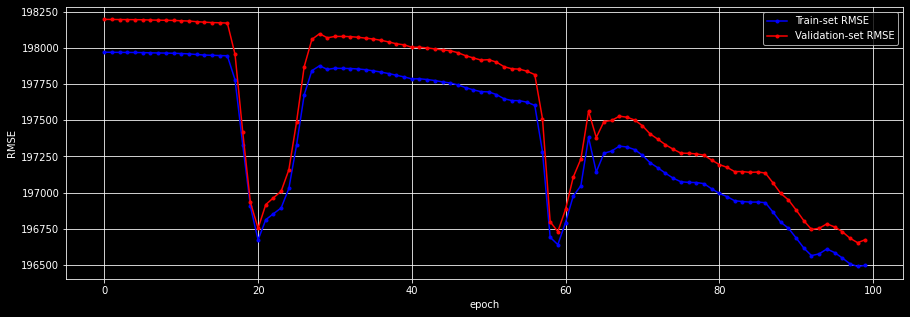

In [ ]:
# ▶ Train, Validation Set 성능 비교
import numpy as np
train_rmse = reg.history['train_rmse']
val_rmse = reg.history['valid_rmse']

x_len = np.arange(len(val_rmse))
plt.figure(figsize=(15, 5))
plt.plot(x_len, train_rmse, marker='.', c='blue', label="Train-set RMSE")
plt.plot(x_len, val_rmse, marker='.', c='red', label="Validation-set RMSE")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.show()

In [ ]:
# ▶ RMSE 측정
preds = reg.predict(X_test)
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, preds)**0.5
RMSE

192290.85606106478

### · 변수 중요도 분석(Global, Local)
---
* TabNet의 장점 : 개별 Instance에 대한 Local 중요도와, 전체 관점에서 Global 중요도를 확인 가능

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48.]),
 <a list of 49 Text major ticklabel objects>)

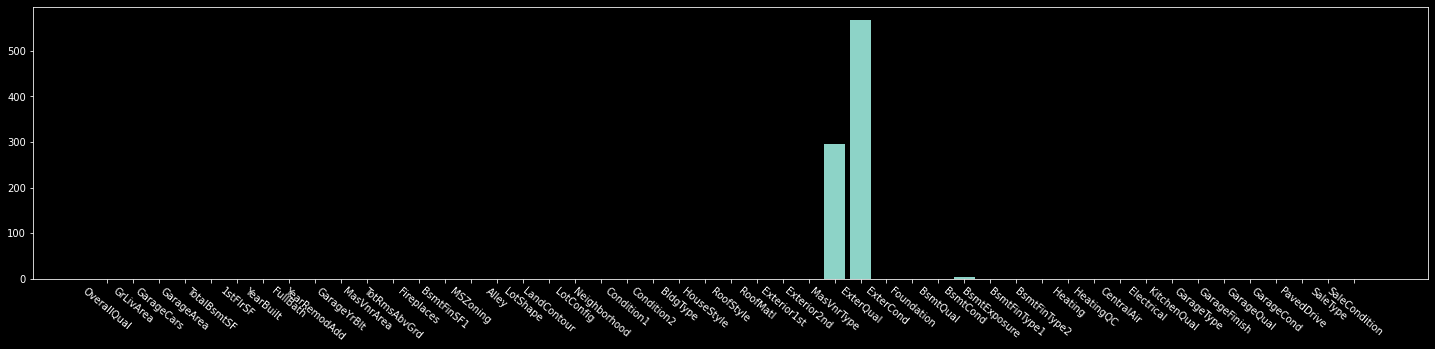

In [ ]:
# ▶ 개별 값 변수 중요도
# ▶ 영향을 끼친 변수는 0으로 출력
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

explain_matrix, masks = reg.explain(X_test)

fig = plt.figure(figsize=(25,5));
plt.bar(features_list[1:], explain_matrix[0]);
plt.xticks(features_list[1:]);
plt.xticks(rotation=-40)

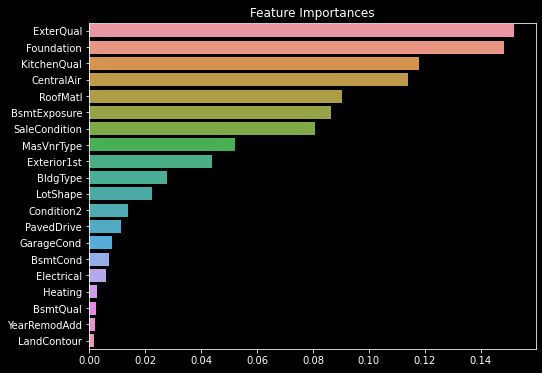

In [ ]:
# ▶ Global 영향도 확인
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = reg.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = features_list[1:])
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

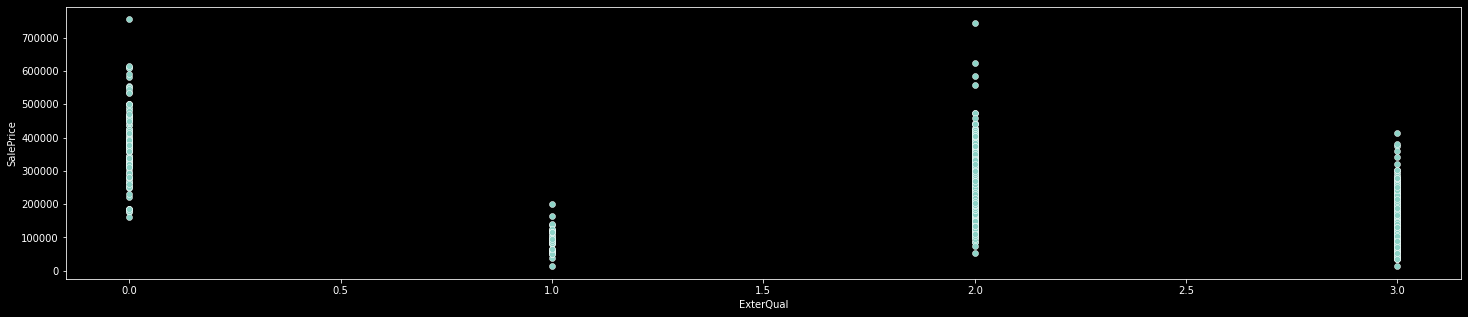

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

fig = plt.figure(figsize=(25,5));
sns.scatterplot(df['ExterQual'], df['SalePrice']);